In [21]:
import pandas as pd
import numpy as np

### Loading Data

In [3]:
df1 = pd.read_csv('telco_features_clean.csv')
df2 = pd.read_csv('telco_labels_clean.csv')
df3 = pd.read_csv('telco_meta_clean.csv')

In [4]:
df1.head(2)

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Snapshot_Date
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2024-06-01
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2024-06-01


In [5]:
df_ = pd.merge(df1, df3, on=['customerID', 'Snapshot_Date'], how='inner')

In [6]:
df = pd.merge(df_, df2, on=['customerID', 'Snapshot_Date'], how='inner')

In [7]:
df

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Snapshot_Date,gender,SeniorCitizen,Partner,Dependents,Churn
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,...,Yes,Electronic check,29.85,29.85,2024-06-01,Female,0,Yes,No,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,...,No,Mailed check,56.95,1889.50,2024-06-01,Male,0,No,No,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,...,Yes,Mailed check,53.85,108.15,2024-06-01,Male,0,No,No,Yes
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,2024-06-01,Male,0,No,No,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,...,Yes,Electronic check,70.70,151.65,2024-06-01,Female,0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26063,3458-GDKLN,1,Yes,No,Fiber optic,No,No,No,No,Yes,...,Yes,Electronic check,97.95,97.95,2024-07-01,Female,0,No,No,No
26064,4010-WBPGY,7,Yes,No,Fiber optic,No,No,No,No,Yes,...,Yes,Electronic check,85.49,611.70,2024-07-01,Male,0,No,No,No
26065,5374-KFGMC,12,Yes,Yes,Fiber optic,No,No,Yes,No,No,...,Yes,Electronic check,72.50,878.52,2024-07-01,Male,1,No,No,Yes
26066,1517-UTLAA,1,Yes,No,Fiber optic,No,Yes,No,No,Yes,...,Yes,Electronic check,76.06,80.66,2024-07-01,Female,0,Yes,No,Yes


In [8]:
df.to_csv('telco_merged.csv', index=False)

### EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\glsam\AppData\Local\Temp\ipykernel_20704\4232787652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette='coolwarm')


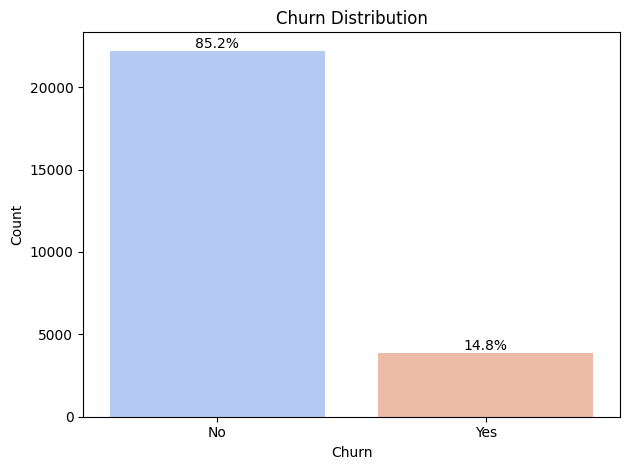

In [10]:
df['Churn'].value_counts()
# Countplot
ax = sns.countplot(data=df, x='Churn', palette='coolwarm')

# Calculate total count
total = len(df)

# Annotate with percentages
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

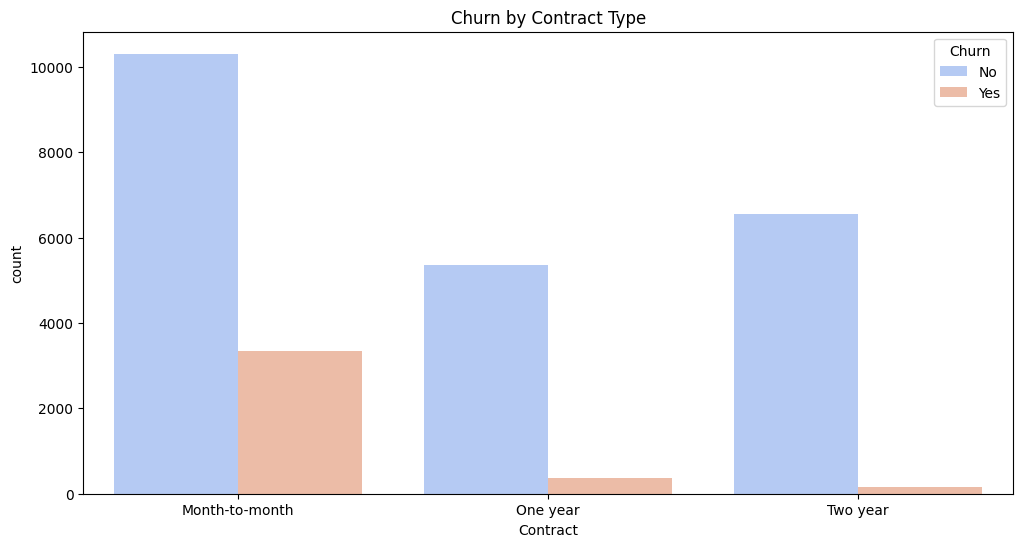

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title("Churn by Contract Type")
# plt.xticks(rotation=30)
plt.show()

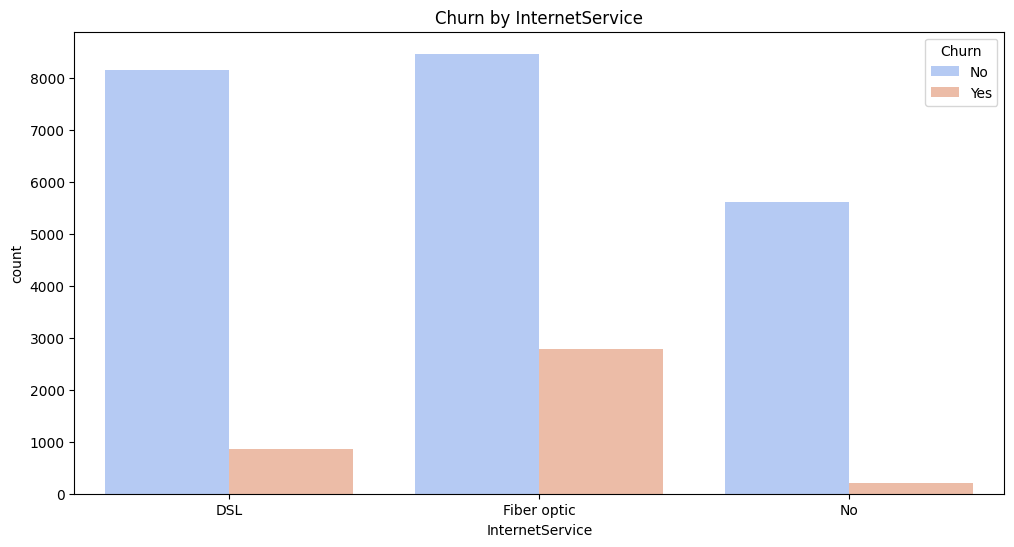

In [12]:
variable = 'InternetService'

plt.figure(figsize=(12,6))
sns.countplot(data=df, x=variable, hue='Churn', palette='coolwarm')
plt.title(f"Churn by {variable}")
# plt.xticks(rotation=30)
plt.show()

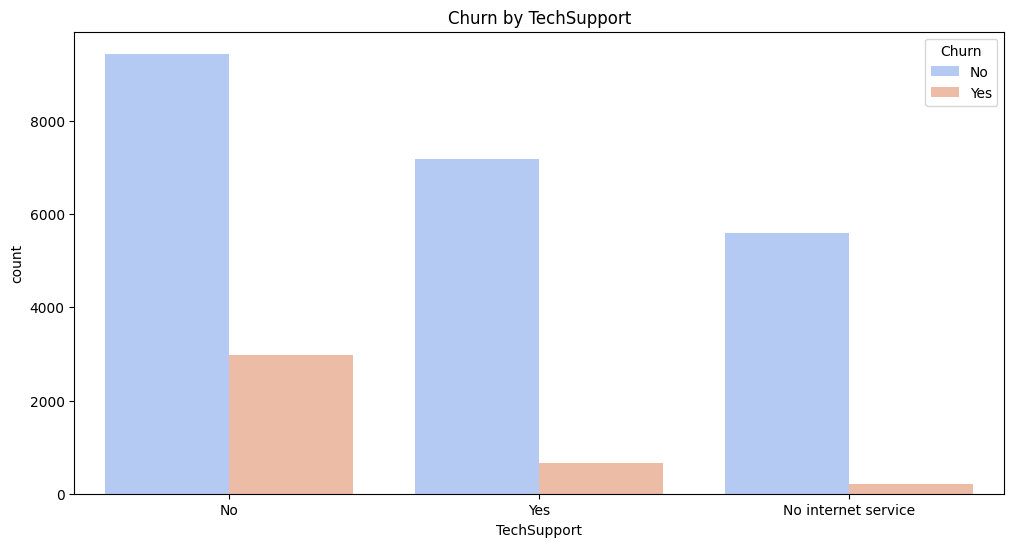

In [13]:
variable = 'TechSupport'

plt.figure(figsize=(12,6))
sns.countplot(data=df, x=variable, hue='Churn', palette='coolwarm')
plt.title(f"Churn by {variable}")
# plt.xticks(rotation=30)
plt.show()

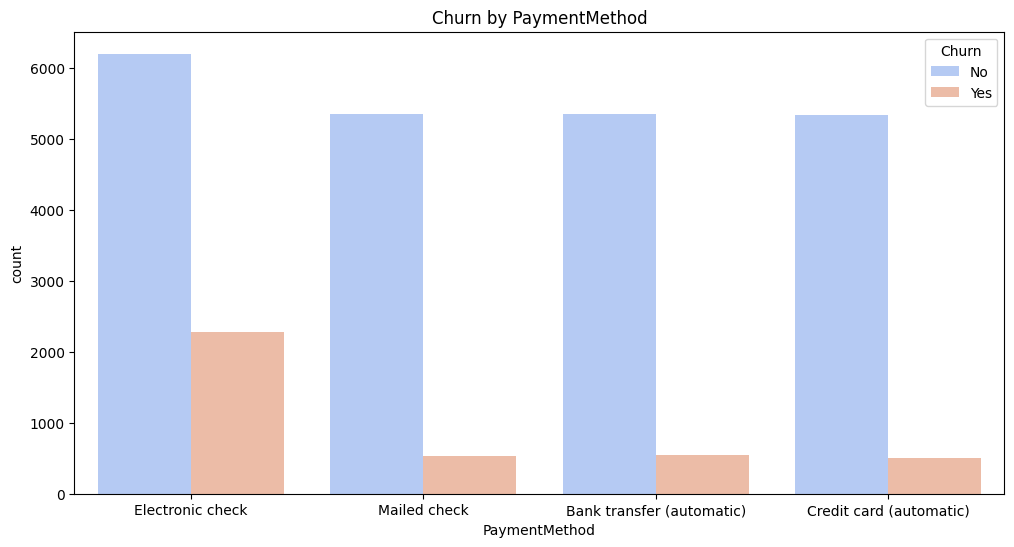

In [14]:
variable = 'PaymentMethod'

plt.figure(figsize=(12,6))
sns.countplot(data=df, x=variable, hue='Churn', palette='coolwarm')
plt.title(f"Churn by {variable}")
# plt.xticks(rotation=30)
plt.show()

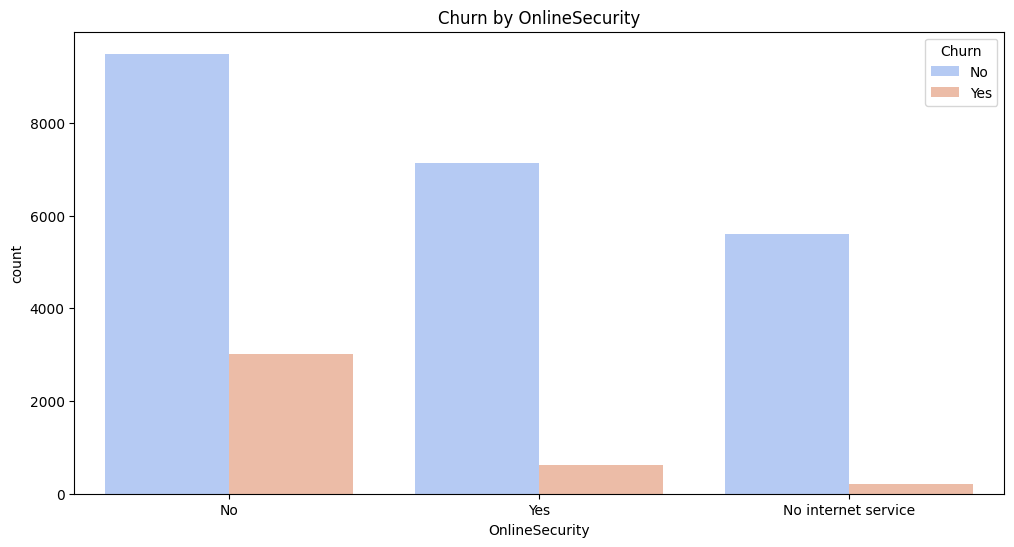

In [15]:
variable = 'OnlineSecurity'

plt.figure(figsize=(12,6))
sns.countplot(data=df, x=variable, hue='Churn', palette='coolwarm')
plt.title(f"Churn by {variable}")
# plt.xticks(rotation=30)
plt.show()

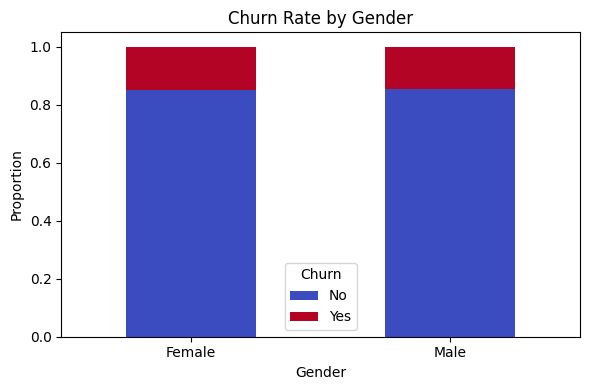

In [16]:
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn.plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')

plt.title("Churn Rate by Gender")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

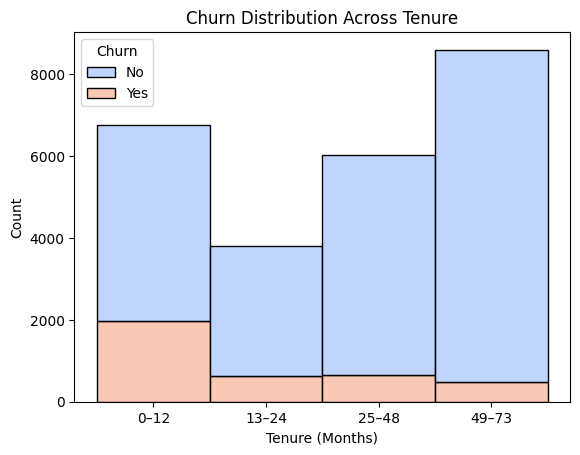

In [17]:
df['tenure_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 73], labels=['0–12', '13–24', '25–48', '49–73'])

sns.histplot(data=df, x='tenure_bin', hue='Churn', multiple='stack', palette='coolwarm')
plt.title("Churn Distribution Across Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()


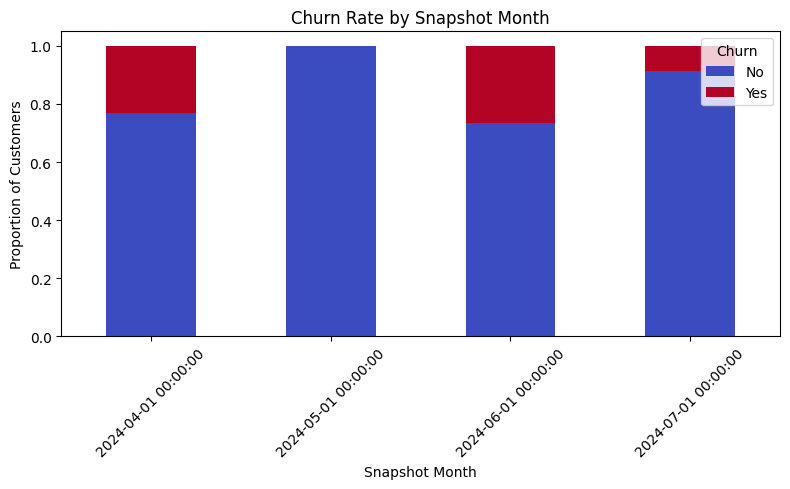

In [18]:
# Ensure Snapshot_Date is in datetime format
df['Snapshot_Date'] = pd.to_datetime(df['Snapshot_Date'])

# Compute churn rate per snapshot month
monthly_churn = (
    df.groupby('Snapshot_Date')['Churn']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .sort_index()
)

# Plot
monthly_churn.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("Churn Rate by Snapshot Month")
plt.xlabel("Snapshot Month")
plt.ylabel("Proportion of Customers")
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

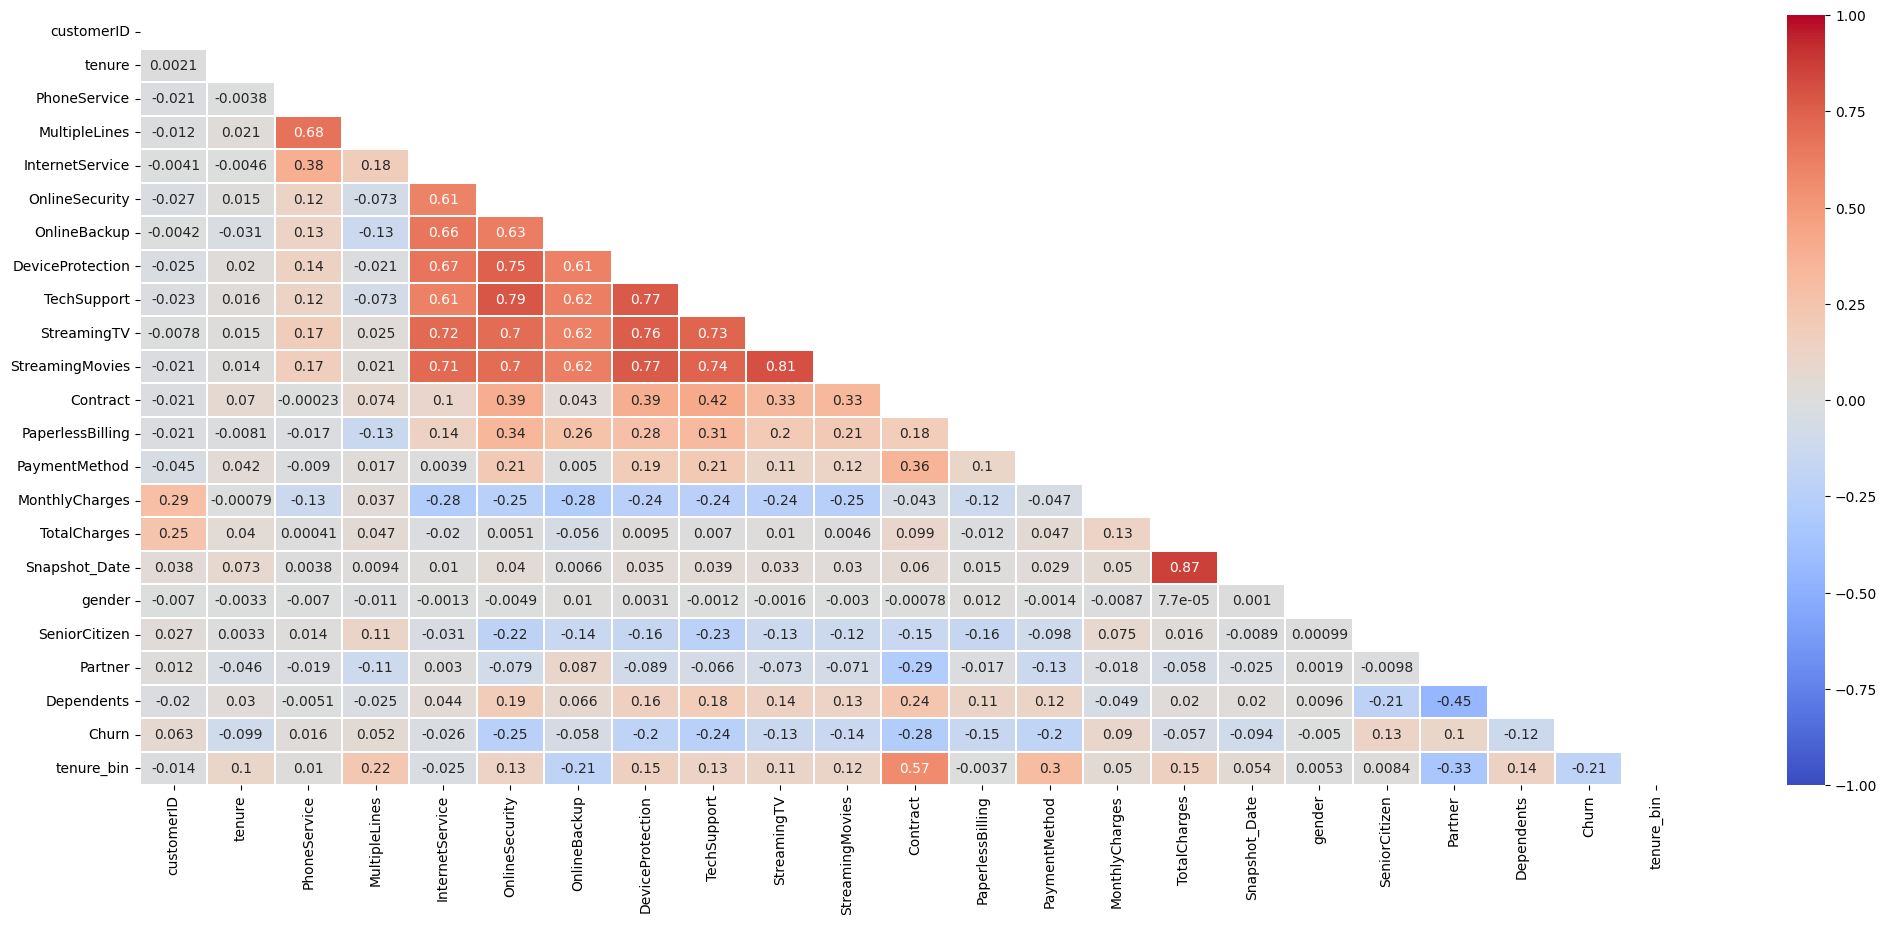

In [22]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)